In [3]:
from sklearn import metrics

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [5]:
c = "Cat"
d = "Dog"
f = "Fox"

# The precision for the Cat class is the number of correctly predicted cat out of all predicted values as Cat
# the recall for Cat is the number of correctly predicted Cat photos out of the number of actual cat 


In [6]:
# True values
y_true = [c,c,c,c,c,f,f,f,f,f,d,d,d,d,d,d]

# Predicated values
y_pred = [c,c,c,d,c,c,c,f,f,f,c,c,d,d,d,d]

print(metrics.confusion_matrix(y_true,y_pred))

[[4 1 0]
 [2 4 0]
 [2 0 3]]


In [8]:
print(metrics.classification_report(y_true,y_pred,digits=3))
# Classification accuracy is a metric that summarizes the performance of a classification model 
# as the number of correct predictions divided by the total number of predictions.
# this is not correct metrics for imbalnced data set
# here in our case we have imbalanced data set
# so will consider other factors (like precision, recall) based on confusion matrix   

              precision    recall  f1-score   support

         Cat      0.500     0.800     0.615         5
         Dog      0.800     0.667     0.727         6
         Fox      1.000     0.600     0.750         5

    accuracy                          0.688        16
   macro avg      0.767     0.689     0.698        16
weighted avg      0.769     0.688     0.699        16



In [1]:
#Precision => TP/(TP+FP)
#Recall => TP/(TP+FN)

# Here false positive and false positive both matters so will use F beta
# F beta = ((1+beta^2)*(Precision*Recall))/(beta^2*Precision+Recall)
# if both FP and FN have equal impact will keep beta = 1
# if FN have high impact will increase beta = 2
# if FP have high impact will reduce beta = 0.5

from sklearn.metrics import fbeta_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
print(fbeta_score(y_true, y_pred, average='macro', beta=0.5))
print(fbeta_score(y_true, y_pred, average='micro', beta=0.5))
print(fbeta_score(y_true, y_pred, average='weighted', beta=0.5))
print(fbeta_score(y_true, y_pred, average=None, beta=0.5))

#i.e
#F0.5-Measure (beta=0.5): More weight on precision, less weight on recall.
#It has the effect of raising the importance of precision and lowering the importance of recall

#F1-Measure (beta=1.0): Balance the weight on precision and recall.

#F2-Measure (beta=2.0): Less weight on precision, more weight on recall
#It has the effect of lowering the importance of precision and increase the importance of recall.

0.23809523809523805
0.3333333333333333
0.23809523809523805
[0.71428571 0.         0.        ]


In [17]:
# TPR = Recall = TP /(TP + FN)
# FPR =  FP /(FP + TN)

# TPR vr FPR graph is ROC curve 
# AUC is area udner this curve 
# So AUC should be > 0.5 area and higher the AUC better the model

# for binary classification example
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score

x,y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_prob_pred = rf.predict_proba(x_test)
y_pred = rf.predict(x_test)


In [20]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,

In [21]:
y_prob_pred

array([[0.01, 0.99],
       [1.  , 0.  ],
       [0.03, 0.97],
       ...,
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ]])

In [18]:
auc = roc_auc_score(y_test,y_pred)
print('AUC Accuracy- ', auc) 

AUC Accuracy-  0.9583333333333335


In [22]:
auc = roc_auc_score(y_test,y_prob_pred[:,1]) 
print('AUC Accuracy- ', auc) 

AUC Accuracy-  0.9840944444444445


In [25]:
auc = roc_auc_score(y_test,y_prob_pred[:,0])
print('AUC Accuracy- ', auc) 

AUC Accuracy-  0.015905555555555555


In [31]:
y_prob_pred[:,1].shape

(600,)

In [36]:
fpr, tpr, thresholds  = roc_curve(y_test,y_prob_pred[:,1]) # this is only for binary classification 
thresholds
# for multiclass might have to do  this manually for all class vs rest of the class and then take avg of score 

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.86, 0.85, 0.84, 0.82, 0.81, 0.8 , 0.79, 0.78,
       0.75, 0.72, 0.71, 0.69, 0.68, 0.67, 0.58, 0.55, 0.53, 0.51, 0.48,
       0.46, 0.45, 0.44, 0.37, 0.35, 0.32, 0.28, 0.25, 0.18, 0.17, 0.15,
       0.14, 0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04,
       0.03, 0.02, 0.01, 0.  ])

In [37]:
#example selecting threshold value ->
#https://github.com/krishnaik06/Gaussian-Trnasformaion/blob/master/Untitled3.ipynb

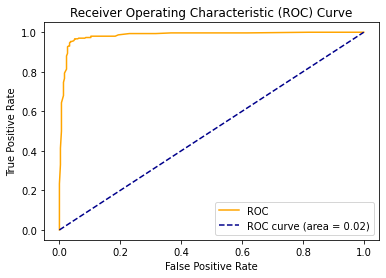

In [39]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
